In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
probability_win = 0.55
DISCOUNT_FACTOR = 0.9
reward_table = np.zeros(101)
reward_table[100] = 1

class StrategyUpdater:
    def __init__(self):
        self.value_states = np.zeros(101)
        self.optimal_strategy = np.zeros(100)

    def calculate_value(self, position, bet, value_states):
        win_outcome = probability_win * (reward_table[position + bet] + DISCOUNT_FACTOR * value_states[position + bet])
        lose_outcome = (1 - probability_win) * (reward_table[position - bet] + DISCOUNT_FACTOR * value_states[position - bet])
        return win_outcome + lose_outcome

    def evaluate_strategy(self, tolerance=1e-14):
        while True:
            # TODO: Evaluate state values for the current strategy until convergence
            # Convergence: The difference in state values between iterations is less than tolerance
            max_diff = 0 
            for position in range(1,100):
                old_value = self.value_states[position]
                bet = int (self.optimal_strategy[position])
                if position + bet > 100:
                    break
                if old_value + bet > 100:
                    break
                new_value = self.calculate_value(position,bet,self.value_states)
                diff = abs(new_value - old_value)
                max_diff = max(diff,max_diff)
            if max_diff < tolerance :
                break
                    

        return self.update_strategy()

    def evaluate_strategy_with_equations(self):
        # TODO: Implement strategy evaluation using a system of linear equations

        return self.update_strategy()

    def update_strategy(self):
        # TODO: Implement the strategy improvement algorithm
        for position in range(1,100):
            best_value = float('-inf')
            best_bet = 0
            for bet in range(1 , position + 1):
                if (position + bet) >100 :
                    break
                value = self.calculate_value(position,bet,self.value_states)
                if value > best_value:
                    best_value = value
                    best_bet = bet
                # self.value_states[position] = best_value
            self.optimal_strategy[position] = best_bet
        

        return self.value_states, self.optimal_strategy


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. 50. 49. 48. 47.
 46. 45. 44. 43. 42. 41. 40. 39. 38. 37. 36. 35. 34. 33. 32. 31. 30. 29.
 28. 27. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


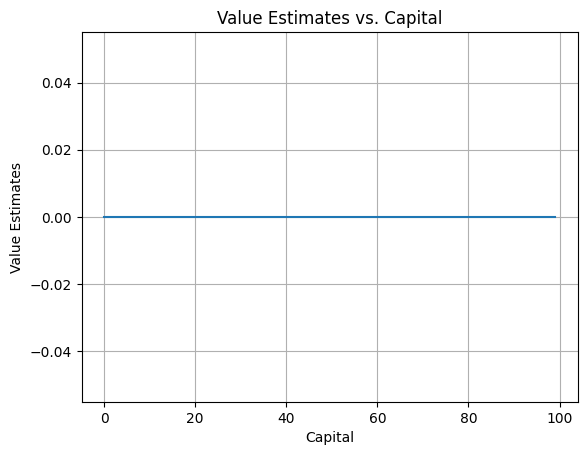

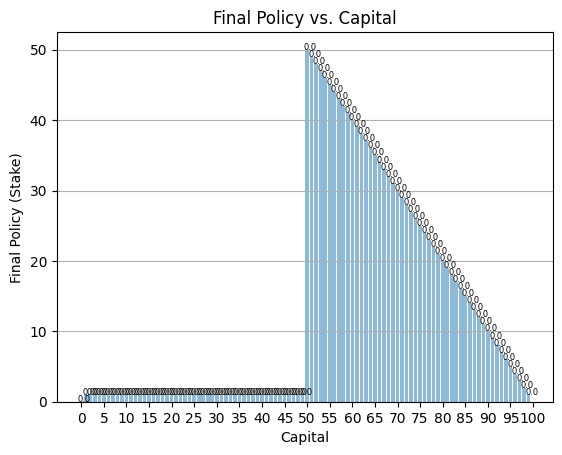

In [43]:
su = StrategyUpdater()
value_estimates, final_strategy = su.evaluate_strategy()
# TODO: perform this once by solving equations too
print(value_estimates)
print(final_strategy)

# Plotting the value estimates
plt.plot(range(100), value_estimates[:100])
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title('Value Estimates vs. Capital')
plt.grid(True)
plt.show()

# Plotting the final policy
plt.bar(range(100), final_strategy, align='center', alpha=0.5)
for idx in range(100):
    plt.text(idx - 0.75, final_strategy[idx] + 0.01, str(round(value_estimates[idx], 2)), fontsize=6)
plt.xlabel('Capital')
plt.xticks(np.arange(0, 101, 5))
plt.ylabel('Final Policy (Stake)')
plt.title('Final Policy vs. Capital')
plt.grid(axis='y')
plt.show()

In [32]:
# Implementing value iteration and strategy improvement algorithms
probability_win = 0.55
DISCOUNT_FACTOR = 0.9
reward_table = np.zeros(101)
reward_table[100] = 1

class ValueCalculator:
    def __init__(self):
        #self.value_states = np.zeros(101, dtype=np.float64)
        #self.optimal_strategy = np.zeros(100, dtype=np.float64)

        self.value_states = np.zeros(101)
        self.optimal_strategy = np.zeros(100)

    def calculate_value(self, position, bet, value_states):
        win_outcome = probability_win * (reward_table[position + bet] + DISCOUNT_FACTOR * value_states[position + bet])
        lose_outcome = (1 - probability_win) * (reward_table[position - bet] + DISCOUNT_FACTOR * value_states[position - bet])
        return win_outcome + lose_outcome

    def perform_value_iteration(self, tolerance=1e-50):
        # TODO: Implement the value iteration algorithm

        while True:
            old_value_states = np.copy(self.value_states)

            for position in range(1, 100):
                best_value = float('-inf')
                for bet in range(1 , position + 1):
                    if (position + bet) >100 :
                        break
                    value = self.calculate_value(position,bet,self.value_states)
                    if value > best_value:
                        best_value = value
                self.value_states[position] = best_value 

            abs_diff = np.abs(self.value_states - old_value_states)
            max_diff = np.max(abs_diff)
            if max_diff < tolerance:
                break   


        return self.perform_strategy_update()

    def perform_strategy_update(self):
        # TODO: Implement the strategy improvement algorithm

        for position in range(1, 100):
                best_value = float('-inf')
                best_bet = 0
                for bet in range(1 , position + 1):
                    if (position + bet) >100 :
                        break
                    value = self.calculate_value(position,bet,self.value_states)
                    if value > best_value:
                        best_value = value
                        best_bet = bet
                # self.value_states[position] = best_value
                self.optimal_strategy[position] = best_bet
        return self.value_states, self.optimal_strategy


[0.         0.00987993 0.01995946 0.02831969 0.04032214 0.04885978
 0.05721149 0.07269011 0.08145887 0.08967252 0.09870663 0.10749519
 0.11557877 0.13876512 0.1468487  0.15531835 0.16456337 0.17264695
 0.18115661 0.19132375 0.19940733 0.20791699 0.21716201 0.22524559
 0.23349247 0.27225    0.28033358 0.28858047 0.29666405 0.30569087
 0.31332442 0.32157131 0.33245125 0.33991935 0.34823809 0.35788937
 0.36476725 0.37198543 0.38651262 0.39398072 0.40229946 0.41195074
 0.41882862 0.4260468  0.43871112 0.44541518 0.45243326 0.45999737
 0.46671763 0.47373571 0.55       0.55808358 0.56633047 0.57317065
 0.58299084 0.58997618 0.5968094  0.60947372 0.61664816 0.62336843
 0.63075997 0.63795061 0.64456445 0.6635351  0.67014894 0.67689639
 0.68464276 0.69103642 0.69773073 0.70653761 0.71293128 0.71962559
 0.72767801 0.73323547 0.73902064 0.77275    0.77936384 0.78611129
 0.79170781 0.79974251 0.80545779 0.8110486  0.82141032 0.82728032
 0.83258095 0.83873717 0.84470959 0.84930336 0.86564235 0.8706

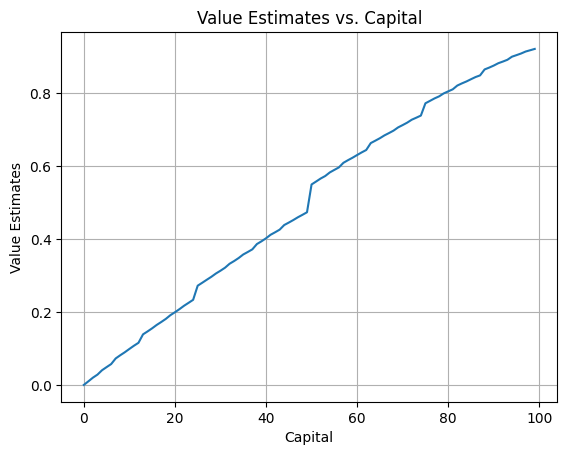

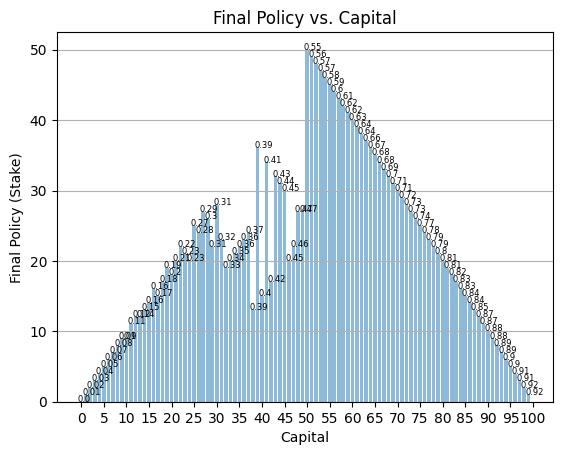

In [33]:
# Initialize and run value iteration
vc = ValueCalculator()
value_estimates, final_strategy = vc.perform_value_iteration()
print(value_estimates)
print(final_strategy)

# Plotting the value estimates
plt.plot(range(100), value_estimates[:100])
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title('Value Estimates vs. Capital')
plt.grid(True)
plt.show()

# Plotting the final policy
plt.bar(range(100), final_strategy, align='center', alpha=0.5)
for idx in range(100):
    plt.text(idx - 0.75, final_strategy[idx] + 0.01, str(round(value_estimates[idx], 2)), fontsize=6)
plt.xlabel('Capital')
plt.xticks(np.arange(0, 101, 5))
plt.ylabel('Final Policy (Stake)')
plt.title('Final Policy vs. Capital')
plt.grid(axis='y')
plt.show()
